In [1]:
import os

os.getcwd()
datafile_path = '../data'

In [2]:
import glob
from natsort import natsorted
from pprint import pprint

search_path = '../data/*/*'
path_list = natsorted(glob.glob(search_path))

In [3]:
pprint(path_list)

['../data/S01_ME/motorexecution_subject1_run1.gdf',
 '../data/S01_ME/motorexecution_subject1_run2.gdf',
 '../data/S01_ME/motorexecution_subject1_run3.gdf',
 '../data/S01_ME/motorexecution_subject1_run4.gdf',
 '../data/S01_ME/motorexecution_subject1_run5.gdf',
 '../data/S01_ME/motorexecution_subject1_run6.gdf',
 '../data/S01_ME/motorexecution_subject1_run7.gdf',
 '../data/S01_ME/motorexecution_subject1_run8.gdf',
 '../data/S01_ME/motorexecution_subject1_run9.gdf',
 '../data/S01_ME/motorexecution_subject1_run10.gdf',
 '../data/S01_MI/motorimagination_subject1_run1.gdf',
 '../data/S01_MI/motorimagination_subject1_run2.gdf',
 '../data/S01_MI/motorimagination_subject1_run3.gdf',
 '../data/S01_MI/motorimagination_subject1_run4.gdf',
 '../data/S01_MI/motorimagination_subject1_run5.gdf',
 '../data/S01_MI/motorimagination_subject1_run6.gdf',
 '../data/S01_MI/motorimagination_subject1_run7.gdf',
 '../data/S01_MI/motorimagination_subject1_run8.gdf',
 '../data/S01_MI/motorimagination_subject1_run9

In [4]:
path_list[0]

'../data/S01_ME/motorexecution_subject1_run1.gdf'

In [5]:
import mne

raw = mne.io.read_raw_gdf(path_list[0])

Extracting EDF parameters from /home/biolab/upper-limb-movements-decoder-from-eeg/data/S01_ME/motorexecution_subject1_run1.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
/home/biolab/upper-limb-movements-decoder-from-eeg/venv/lib/python3.6/site-packages/mne/io/edf/edf.py:1001: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]


In [10]:
pprint(raw.ch_names)

['eeg-0',
 'eeg-1',
 'eeg-2',
 'eeg-3',
 'eeg-4',
 'eeg-5',
 'eeg-6',
 'eeg-7',
 'eeg-8',
 'eeg-9',
 'eeg-10',
 'eeg-11',
 'eeg-12',
 'eeg-13',
 'eeg-14',
 'eeg-15',
 'eeg-16',
 'eeg-17',
 'eeg-18',
 'eeg-19',
 'eeg-20',
 'eeg-21',
 'eeg-22',
 'eeg-23',
 'eeg-24',
 'eeg-25',
 'eeg-26',
 'eeg-27',
 'eeg-28',
 'eeg-29',
 'eeg-30',
 'eeg-31',
 'eeg-32',
 'eeg-33',
 'eeg-34',
 'eeg-35',
 'eeg-36',
 'eeg-37',
 'eeg-38',
 'eeg-39',
 'eeg-40',
 'eeg-41',
 'eeg-42',
 'eeg-43',
 'eeg-44',
 'eeg-45',
 'eeg-46',
 'eeg-47',
 'eeg-48',
 'eeg-49',
 'eeg-50',
 'eeg-51',
 'eeg-52',
 'eeg-53',
 'eeg-54',
 'eeg-55',
 'eeg-56',
 'eeg-57',
 'eeg-58',
 'eeg-59',
 'eeg-60',
 'eog-r',
 'eog-m',
 'eog-l',
 'thumb_near',
 'thumb_far',
 'thumb_index',
 'index_near',
 'index_far',
 'index_middle',
 'middle_near',
 'middle_far',
 'middle_ring',
 'ring_near',
 'ring_far',
 'ring_little',
 'litte_near',
 'litte_far',
 'thumb_palm',
 'wrist_bend',
 'roll',
 'pitch',
 'gesture',
 'handPosX',
 'handPosY',
 'handPosZ',

In [11]:
import matplotlib.pyplot as plt
# plt.plot(raw['eeg-0'][0])

In [18]:
type(raw)

mne.io.edf.edf.RawGDF

In [19]:
type(raw['eeg-0'][0])

numpy.ndarray

In [13]:
raw.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

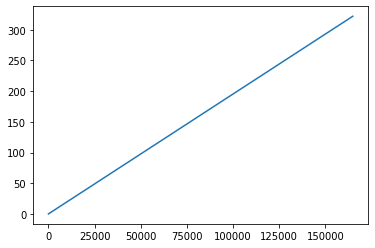

In [17]:
plt.plot(raw['eeg-0'][1])